# Importing Data

In [1]:
#import pandas
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn for graphical enhancement
import seaborn as sns
#import seaborn for mathematical essentials
import numpy as np
import statsmodels.formula.api as smf

#set path to file
file = "./birthweight_low.xlsx"

#reading the excel file and call it weight
weight = pd.read_excel(io = file,
                     header = 0,
                     sheet_name = 0)
#show the first 10 rows of the dataset
weight.head(n=10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [2]:
#show information about the weight dataset, to identify missing values
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [3]:
#print the number (sum) of missing values in each column
print(f"""Number of missing values in columns:
{"-"*100}
{weight.isnull().sum()}""")

Number of missing values in columns:
----------------------------------------------------------------------------------------------------
mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64


# Treating Missing Values

In [4]:
#flag missing values by adding column naming m_ + the name of the original 
#column and adding 1 where missing values are in the original column
for column in weight: 
    if weight[column].isnull().sum() > 0:
        weight['m_' + column] =  weight[column].isnull().astype(int)

In [5]:
#show the rows where medic is missing values
weight.loc[:,:][weight.loc[:,'meduc'].isnull()]


,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
0,69,NaN,5,2.0,62,NaN,4,7,23,9,...,0,1,0,0,1,0,697,1,0,1
111,38,NaN,1,NaN,34,17.0,7,9,11,7,...,0,0,1,0,0,1,3610,1,1,0
114,43,NaN,1,9.0,36,NaN,8,9,5,8,...,0,0,1,0,0,1,3620,1,0,1


In [6]:
#show the rows where npvis is missing values
weight.loc[:,:][weight.loc[:,'npvis'].isnull()]

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
73,47,15.0,2,NaN,39,17.0,9,9,19,7,...,0,0,1,0,0,1,3170,0,1,0
111,38,NaN,1,NaN,34,17.0,7,9,11,7,...,0,0,1,0,0,1,3610,1,1,0
185,38,12.0,2,NaN,32,14.0,9,9,13,0,...,0,1,0,0,1,0,4210,0,1,0


In [7]:
#show the rows where feduc is missing values
weight.loc[:,:][weight.loc[:,'feduc'].isnull()]

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
0,69,NaN,5,2.0,62,NaN,4,7,23,9,...,0,1,0,0,1,0,697,1,0,1
74,42,13.0,7,11.0,26,NaN,9,9,2,4,...,0,1,0,1,0,0,3170,0,0,1
99,51,17.0,6,8.0,38,NaN,8,9,17,6,...,0,1,0,0,0,1,3459,0,0,1
114,43,NaN,1,9.0,36,NaN,8,9,5,8,...,0,0,1,0,0,1,3620,1,0,1
153,37,12.0,8,5.0,40,NaN,7,9,4,0,...,0,1,0,0,0,1,3799,0,0,1
164,36,12.0,3,6.0,31,NaN,7,9,16,2,...,0,1,0,0,0,1,3900,0,0,1
191,30,12.0,5,12.0,38,NaN,5,7,3,2,...,0,1,0,0,0,1,4610,0,0,1


In [8]:
#printing descriptive statistics
weight.describe(include="number").round(2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,...,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,...,0.27,0.38,0.35,0.35,0.34,0.31,3334.09,0.02,0.02,0.04
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,...,0.45,0.49,0.48,0.48,0.48,0.46,646.70,0.12,0.12,0.19
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,697.00,0.00,0.00,0.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2916.25,0.00,0.00,0.00
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,...,0.00,0.00,0.00,0.00,0.00,0.00,3452.00,0.00,0.00,0.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,...,1.00,1.00,1.00,1.00,1.00,1.00,3759.50,0.00,0.00,0.00
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,...,1.00,1.00,1.00,1.00,1.00,1.00,4933.00,1.00,1.00,1.00


In [9]:
#calculate the median of meduc
median_meduc = weight['meduc'].median()
weight['meduc'].fillna(value = median_meduc,
                      inplace = True)
#calculate the median of feduc
median_feduc = weight['feduc'].median()
weight['feduc'].fillna(value = median_feduc,
                      inplace = True)
#calculate the median of npvis
median_npvis = weight['npvis'].median()
weight['npvis'].fillna(value = median_npvis,
                      inplace = True)

In [10]:
#printing descriptive statistics
weight.describe(include="number").round(2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,...,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.61,39.29,13.85,8.19,8.96,10.93,5.40,...,0.27,0.38,0.35,0.35,0.34,0.31,3334.09,0.02,0.02,0.04
std,10.25,2.04,1.36,4.23,8.98,2.59,1.58,0.65,6.10,3.00,...,0.45,0.49,0.48,0.48,0.48,0.46,646.70,0.12,0.12,0.19
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,697.00,0.00,0.00,0.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2916.25,0.00,0.00,0.00
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,...,0.00,0.00,0.00,0.00,0.00,0.00,3452.00,0.00,0.00,0.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,...,1.00,1.00,1.00,1.00,1.00,1.00,3759.50,0.00,0.00,0.00
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,...,1.00,1.00,1.00,1.00,1.00,1.00,4933.00,1.00,1.00,1.00


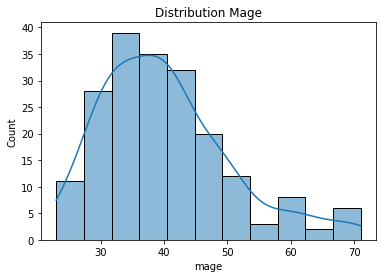

Skewness = 0.92
--------------------------------------------------------------------------------


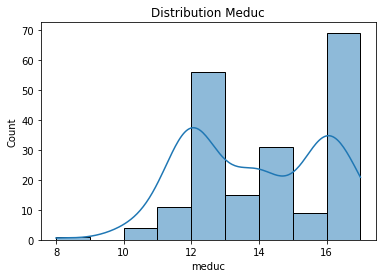

Skewness = -0.07
--------------------------------------------------------------------------------


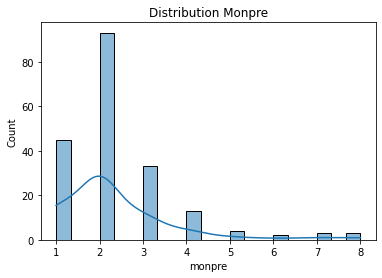

Skewness = 2.03
--------------------------------------------------------------------------------


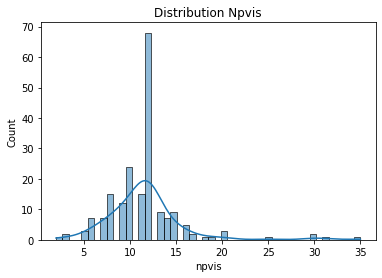

Skewness = 2.23
--------------------------------------------------------------------------------


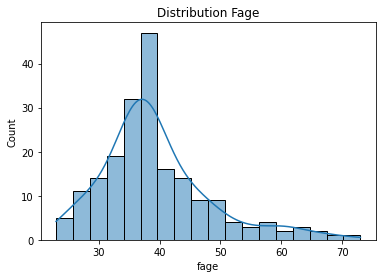

Skewness = 1.12
--------------------------------------------------------------------------------


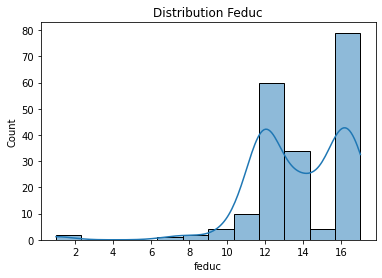

Skewness = -1.34
--------------------------------------------------------------------------------


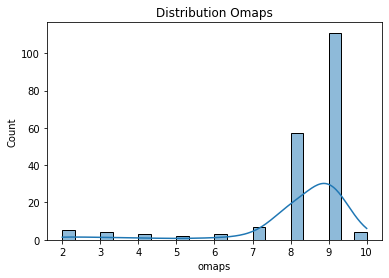

Skewness = -2.64
--------------------------------------------------------------------------------


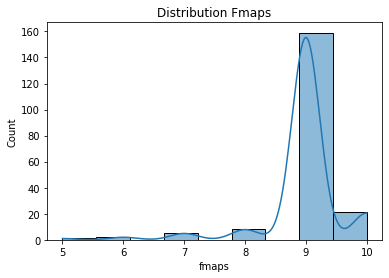

Skewness = -2.55
--------------------------------------------------------------------------------


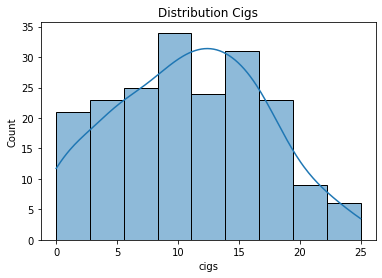

Skewness = 0.03
--------------------------------------------------------------------------------


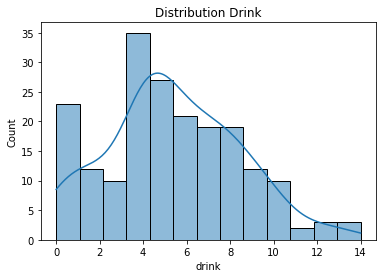

Skewness = 0.23
--------------------------------------------------------------------------------


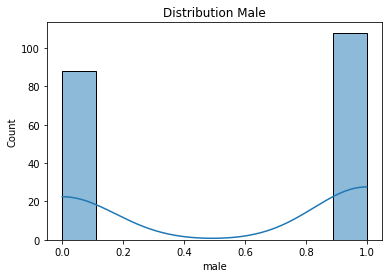

Skewness = -0.21
--------------------------------------------------------------------------------


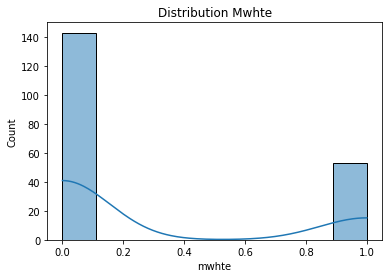

Skewness = 1.04
--------------------------------------------------------------------------------


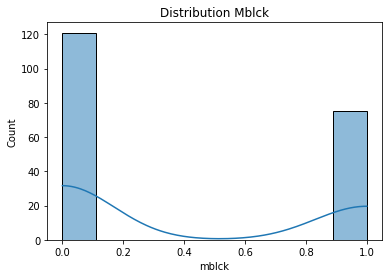

Skewness = 0.49
--------------------------------------------------------------------------------


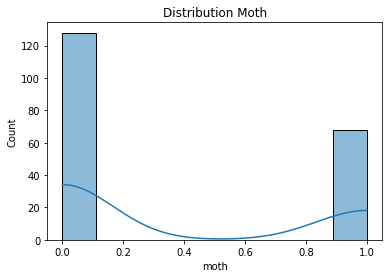

Skewness = 0.65
--------------------------------------------------------------------------------


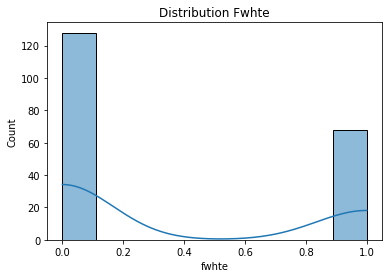

Skewness = 0.65
--------------------------------------------------------------------------------


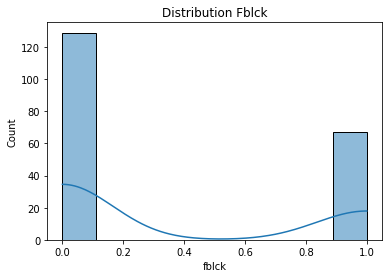

Skewness = 0.67
--------------------------------------------------------------------------------


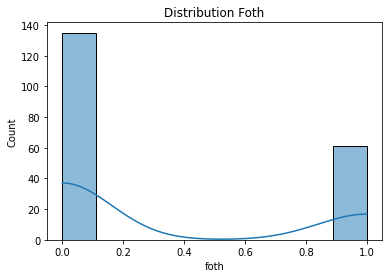

Skewness = 0.82
--------------------------------------------------------------------------------


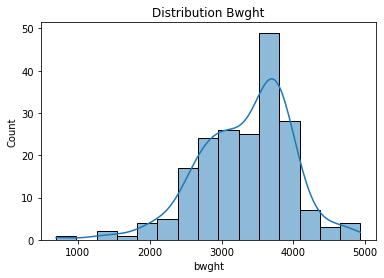

Skewness = -0.66
--------------------------------------------------------------------------------


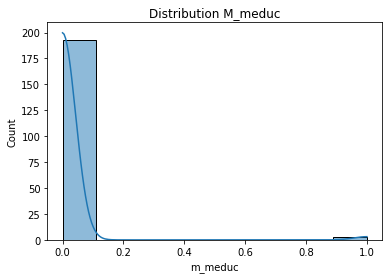

Skewness = 7.96
--------------------------------------------------------------------------------


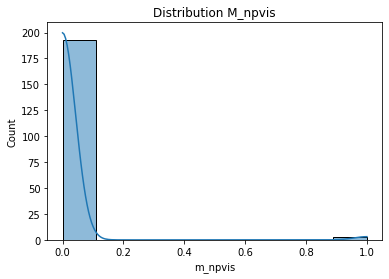

Skewness = 7.96
--------------------------------------------------------------------------------


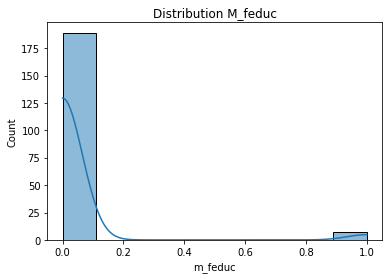

Skewness = 5.04
--------------------------------------------------------------------------------


In [11]:
#histograms for every attribute in weight
for column in weight:
    sns.histplot( data = weight,
                      x      = column,
                      kde    = True
                      )
    plt.title(label   = "Distribution " + column.capitalize())
    plt.xlabel(xlabel =  column) 
    plt.ylabel(ylabel = "Count")
    plt.show()
    print(f"""Skewness = {weight[column].skew().round(2)}""")
    print('-' * 80)

# Feature Engineering

In [12]:
#Feature engineering by multiplying variables

weight['drink_cigs_mage']=weight['drink']*weight['cigs']*weight['mage']
weight['drink_cigs_fage']=weight['drink']*weight['cigs']*weight['fage']
weight['drink_sqr']=weight['drink']*weight['drink']
weight['cigs_sqr']=weight['cigs']*weight['cigs']
weight['mage_sqr']=weight['mage']*weight['mage']
weight['fage_sqr']=weight['fage']*weight['fage']
weight["drink_cigs"] =   weight["drink"] + weight["cigs"]
weight["drink_cigs_sqr"] = weight["drink_cigs"] * weight["drink_cigs"]

#Feature engineering by summing variables
weight['total_educ']=weight['feduc']+weight['meduc']
#Feature engineering by calculating square root
weight['drink_sq_rt']= np.sqrt(weight['drink'])
weight['cigs_sq_rt']= np.sqrt(weight['cigs'])
weight['mage_sq_rt']= np.sqrt(weight['mage'])
weight['fage_sq_rt']= np.sqrt(weight['fage'])
weight['npvis_sq_rt']= np.sqrt(weight['npvis'])

#calculate logarithm value for bwght, meduc, monpre, npvis, fage and feduc
weight['log_bwght'] = np.log(weight['bwght'])
weight['log_meduc'] = np.log(weight['meduc'])
weight['log_monpre'] = np.log(weight['monpre'])
weight['log_npvis'] = np.log(weight['npvis'])
weight['log_fage'] = np.log(weight['fage'])
weight['log_feduc'] = np.log(weight['feduc'])

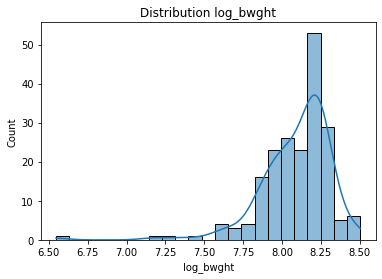

-2.2718506834927417


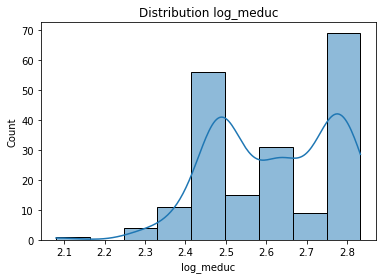

-0.3205076556193342


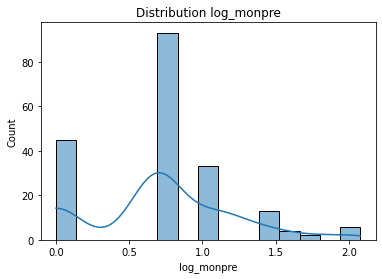

0.30034620332547085


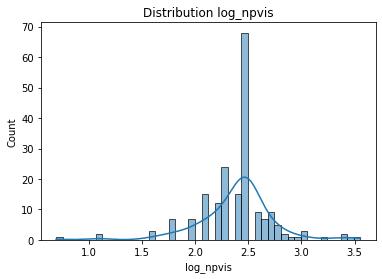

-0.7334013724358767


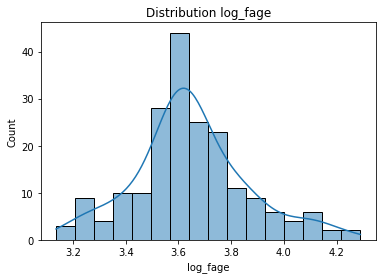

0.35121456049793637


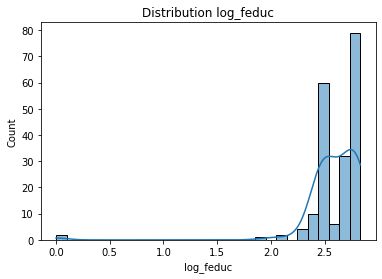

-5.939986959351647


In [13]:
#histograms for all log_ values
for column in weight:
    if  column [:4] =='log_' :
        sns.histplot( data = weight,
                      x      = column,
                      kde    = True
                      )
        plt.title(label   = "Distribution " + column)
        plt.xlabel(xlabel =  column)
        plt.ylabel(ylabel = "Count")
        plt.show()
        print(weight[column].skew())  

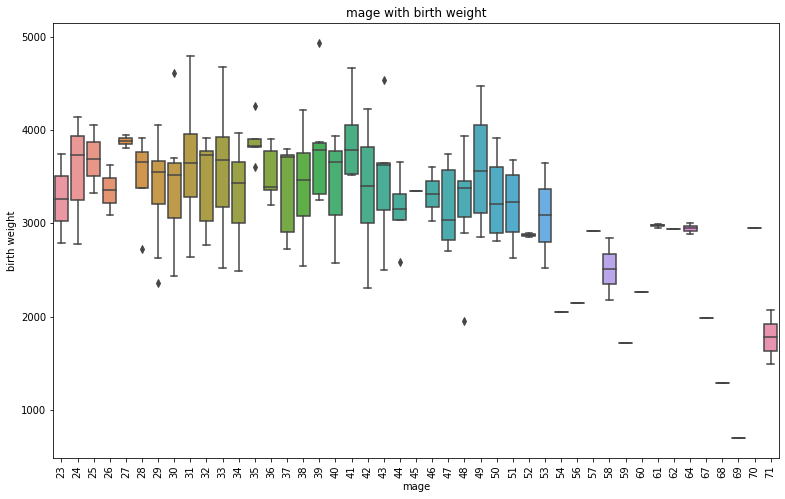

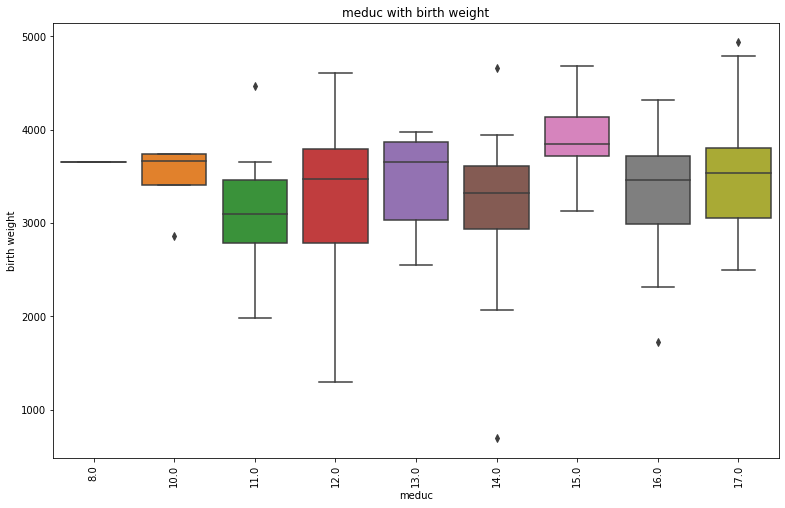

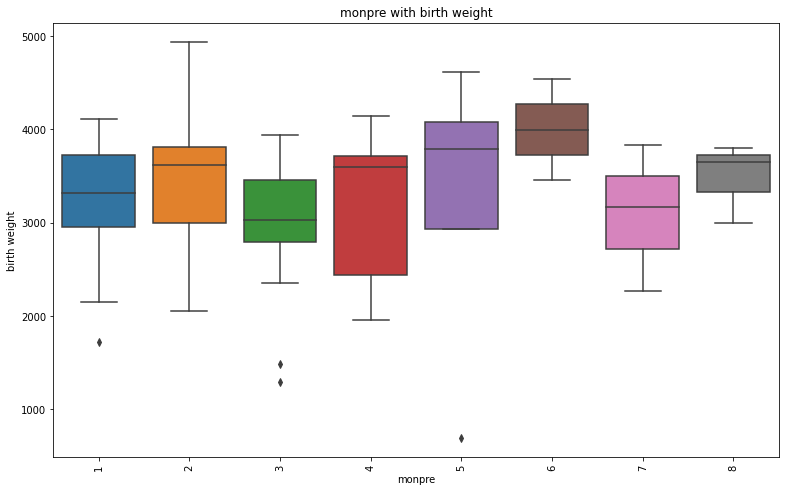

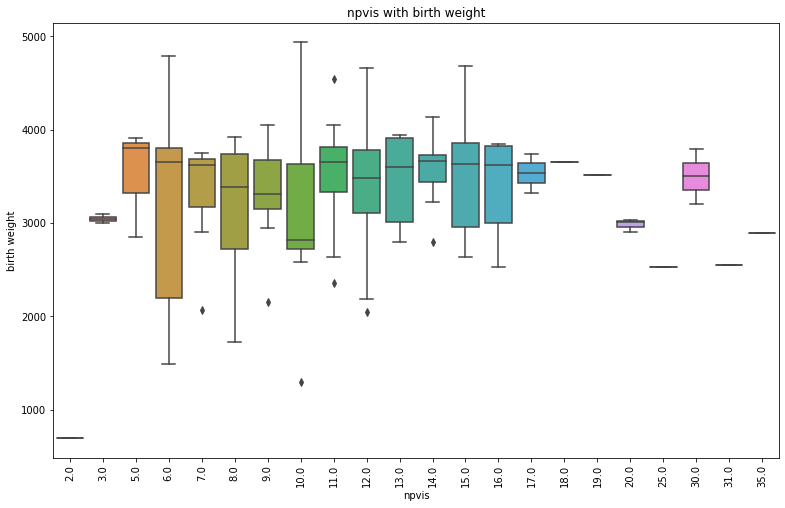

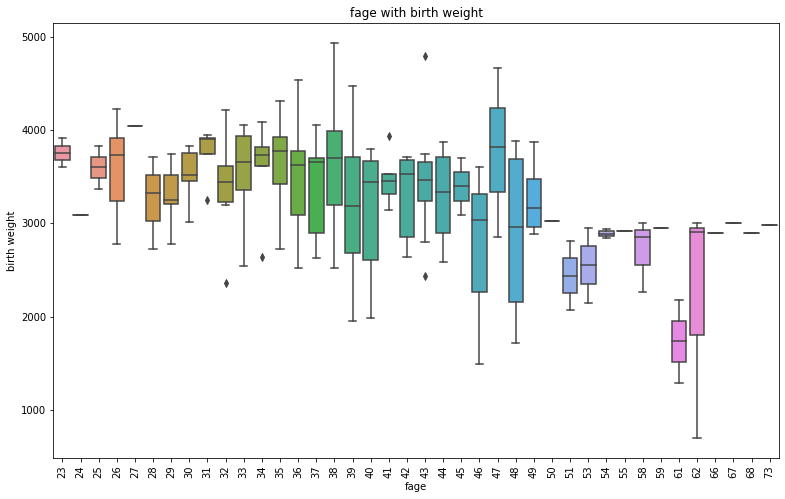

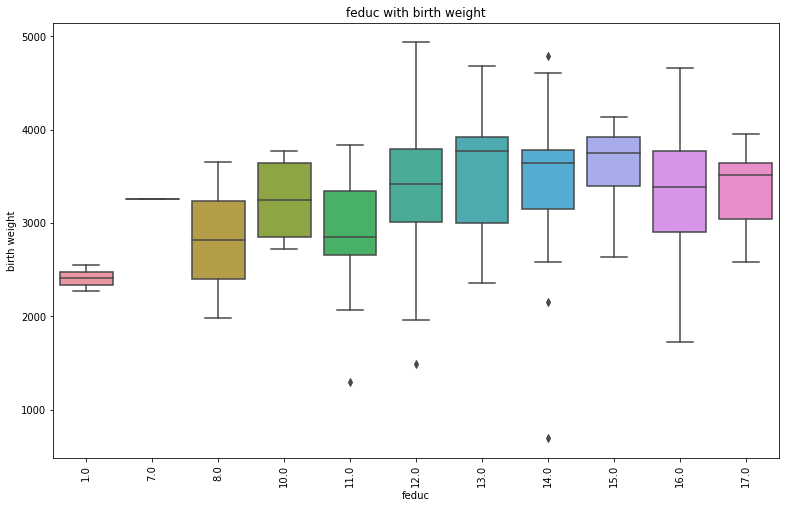

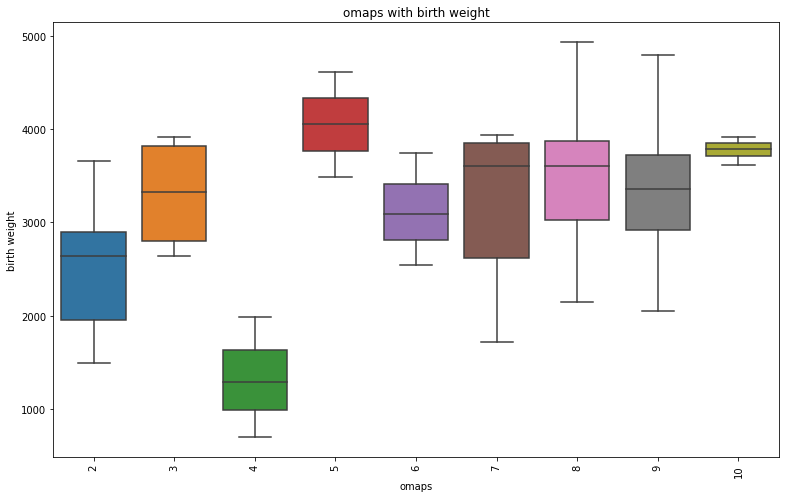

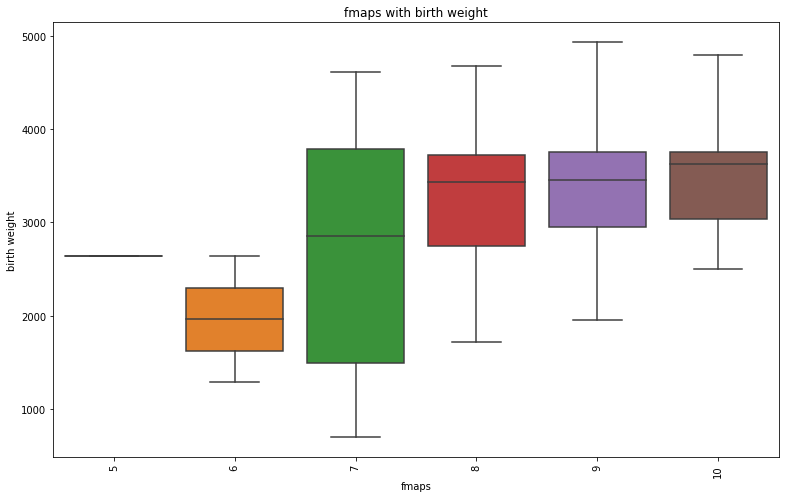

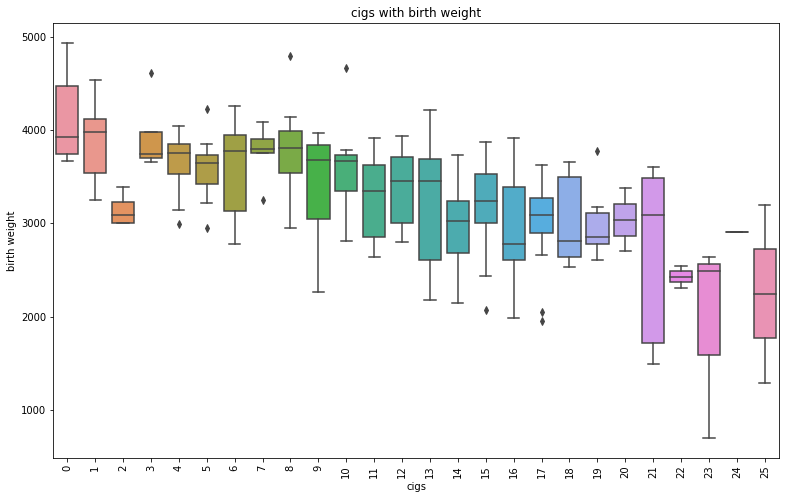

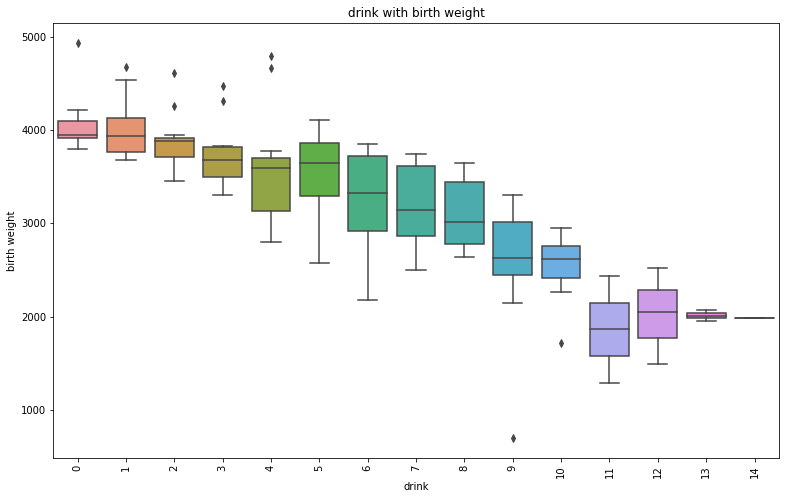

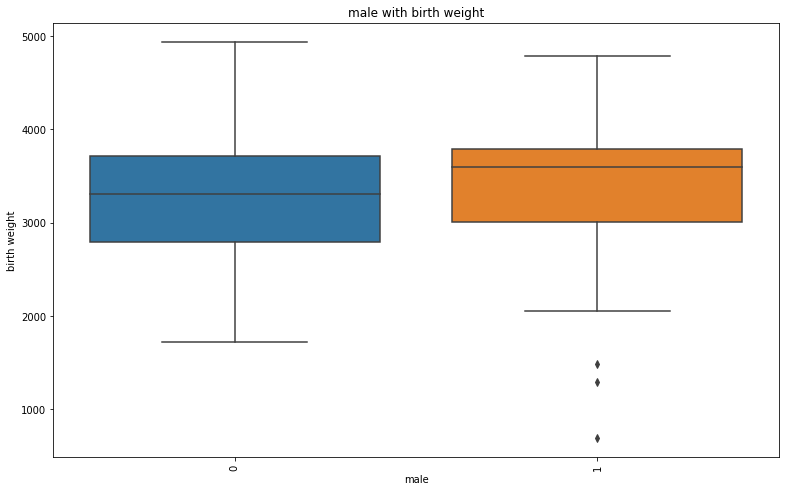

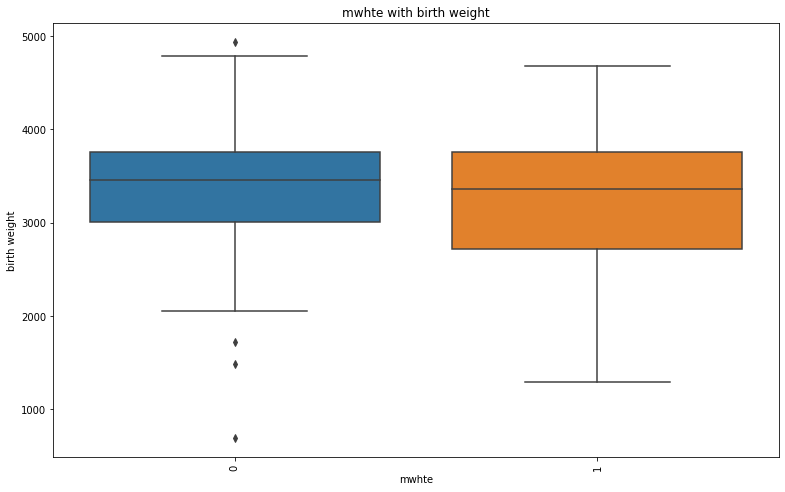

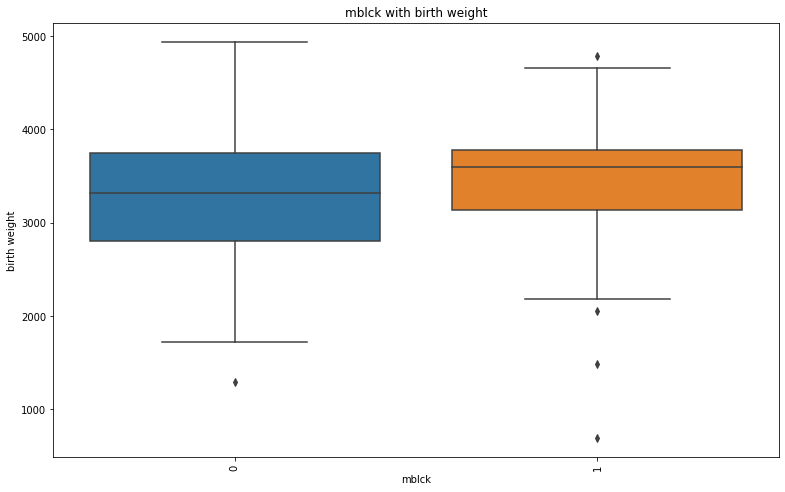

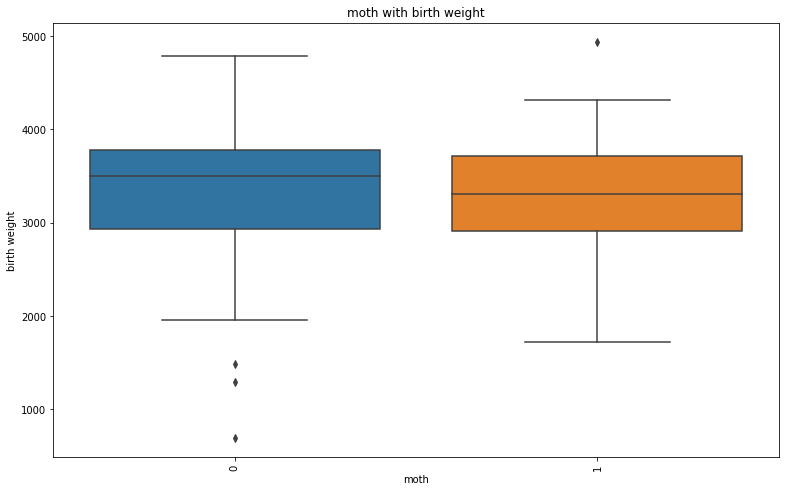

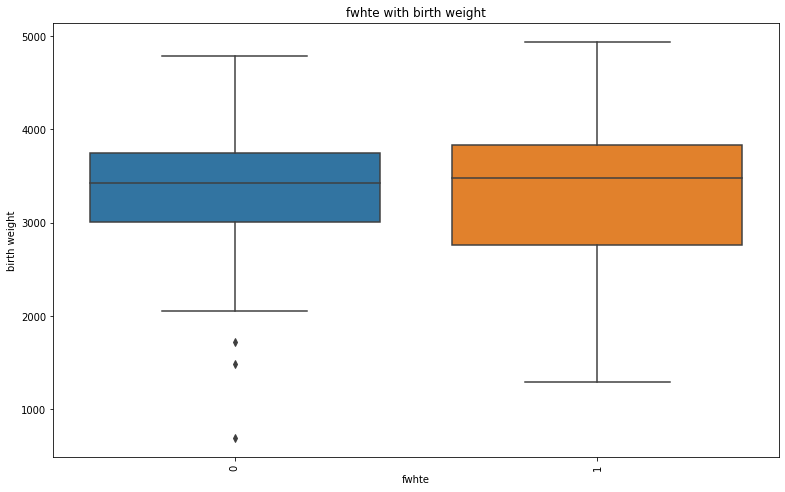

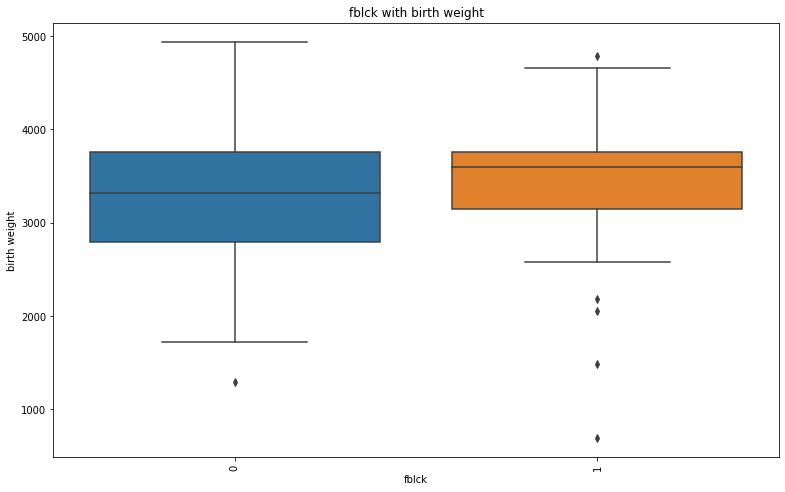

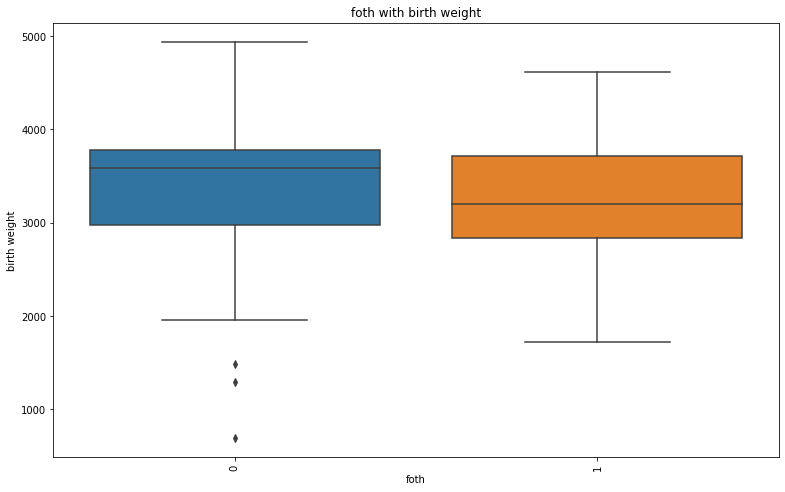

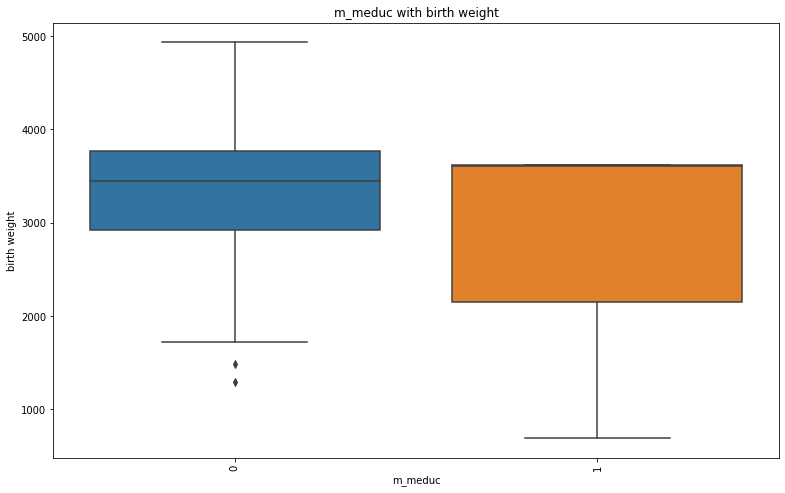

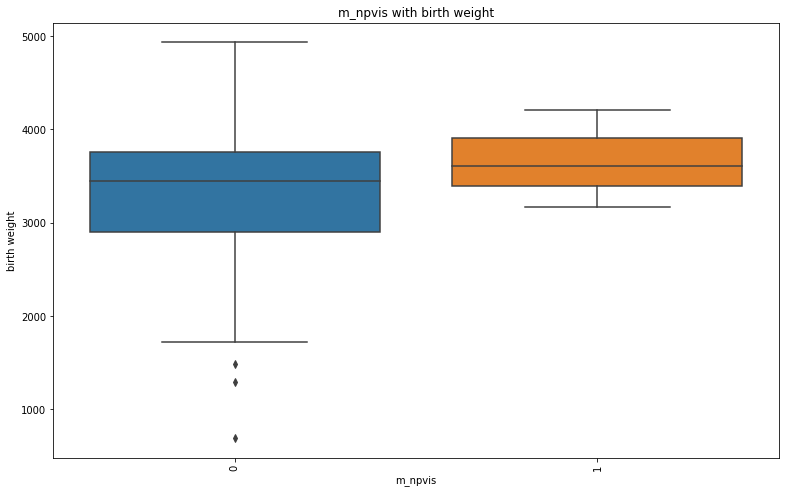

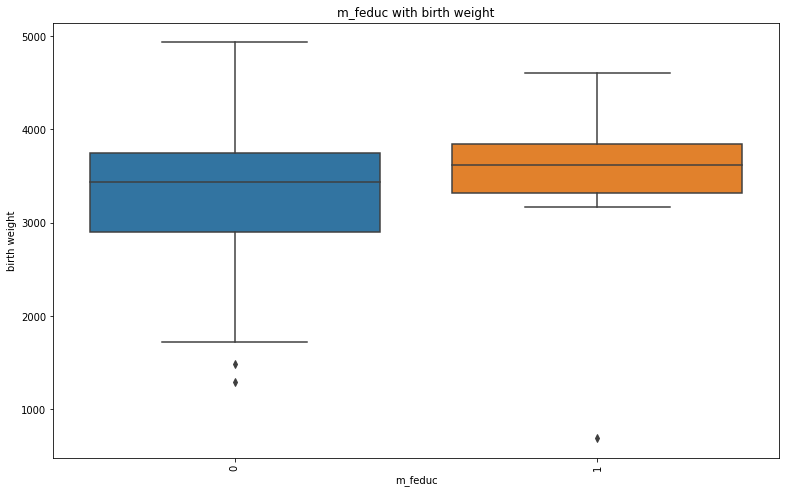

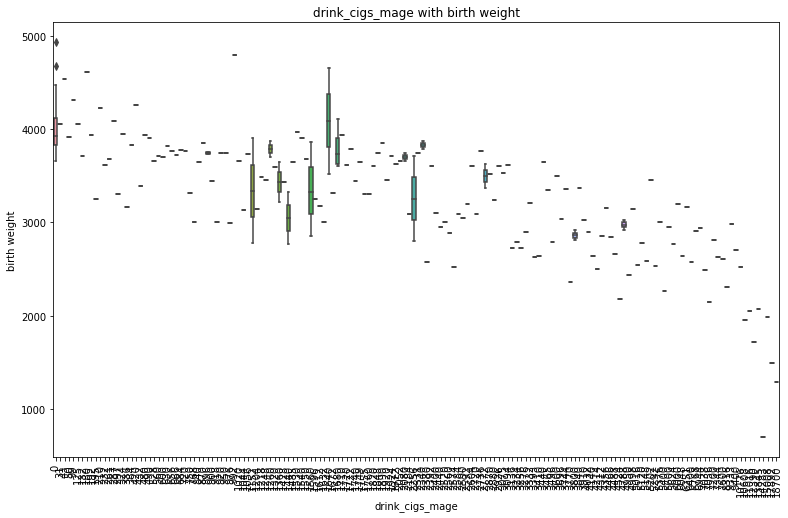

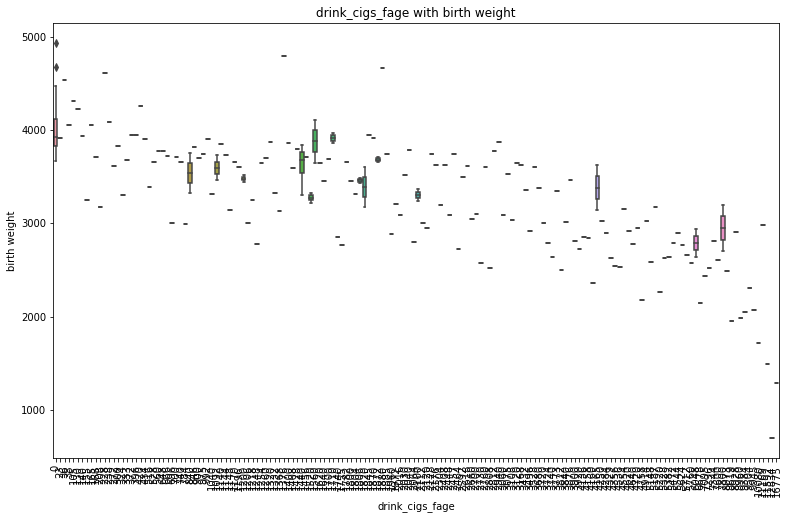

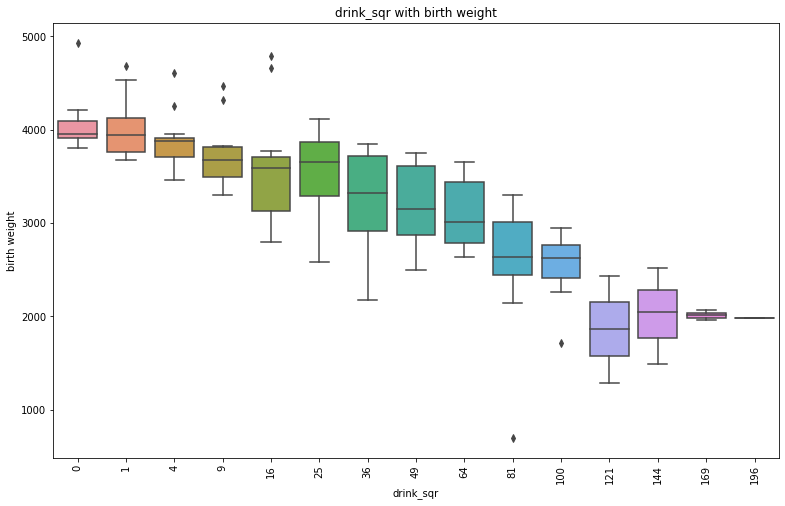

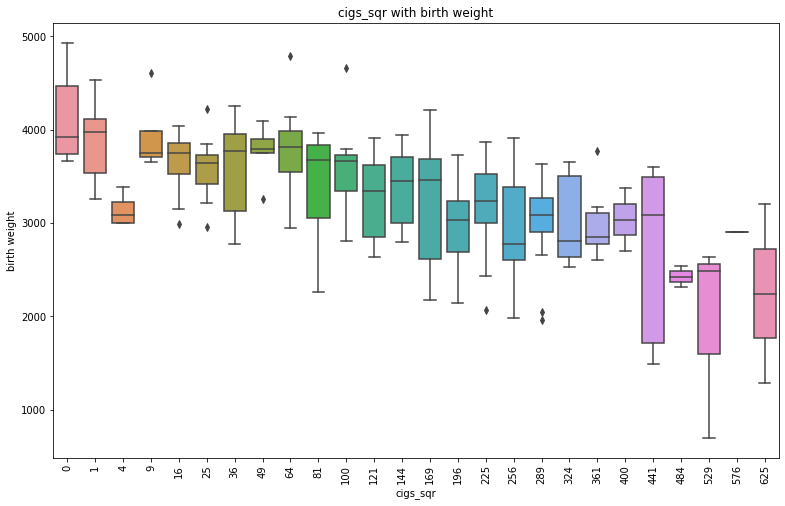

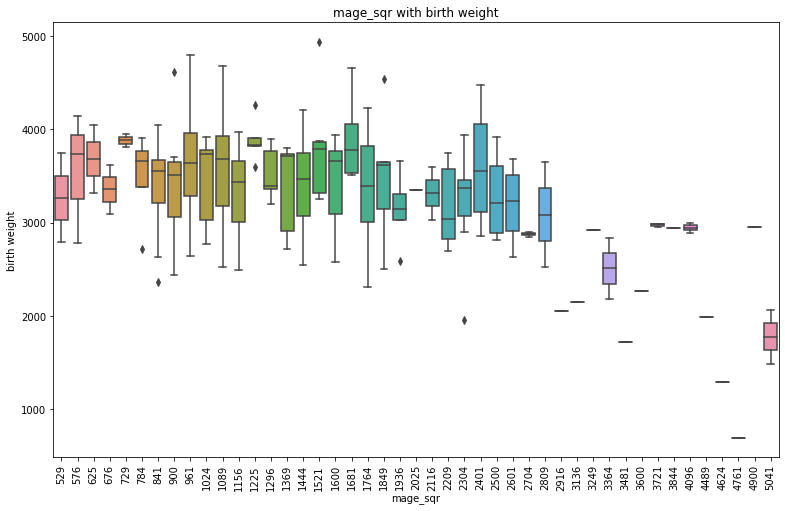

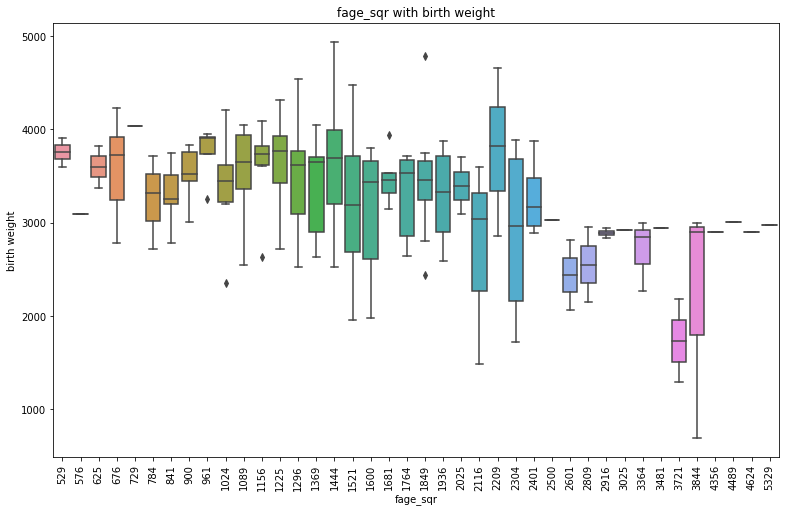

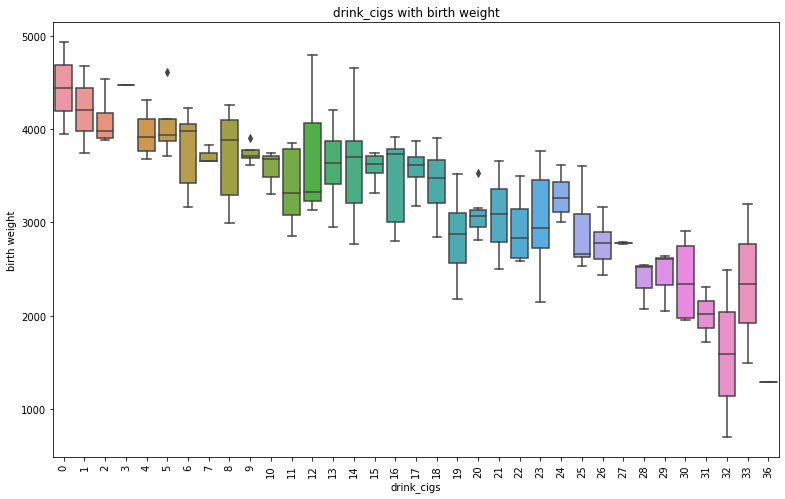

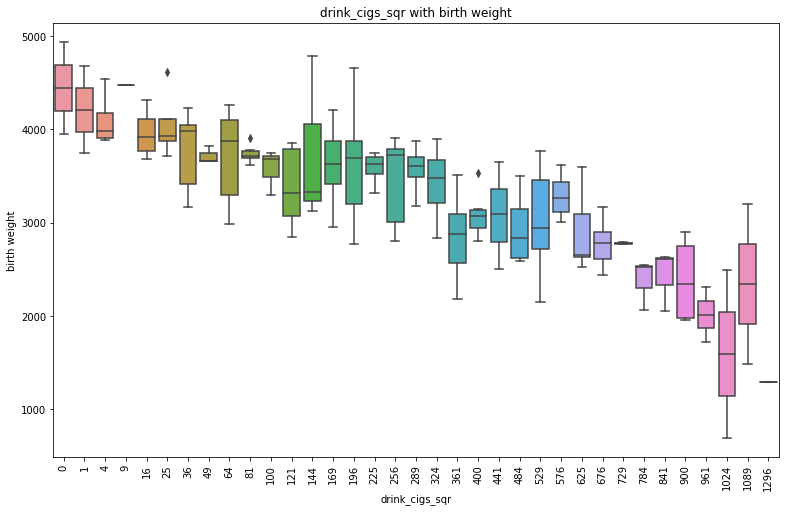

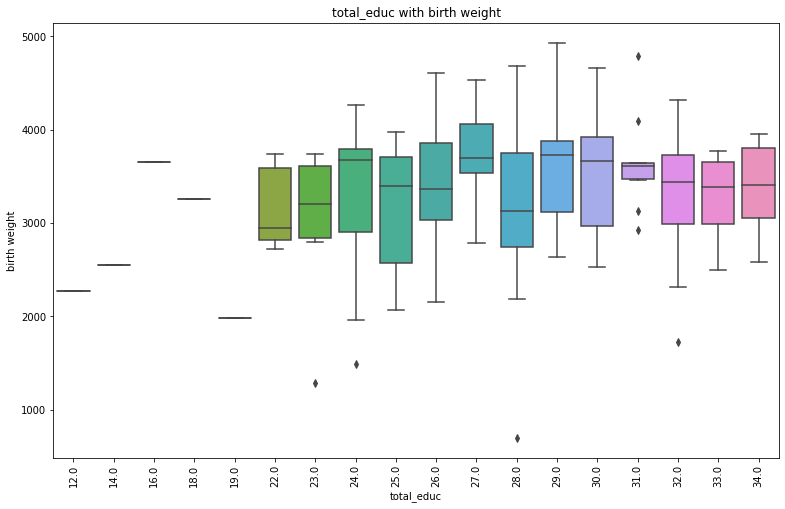

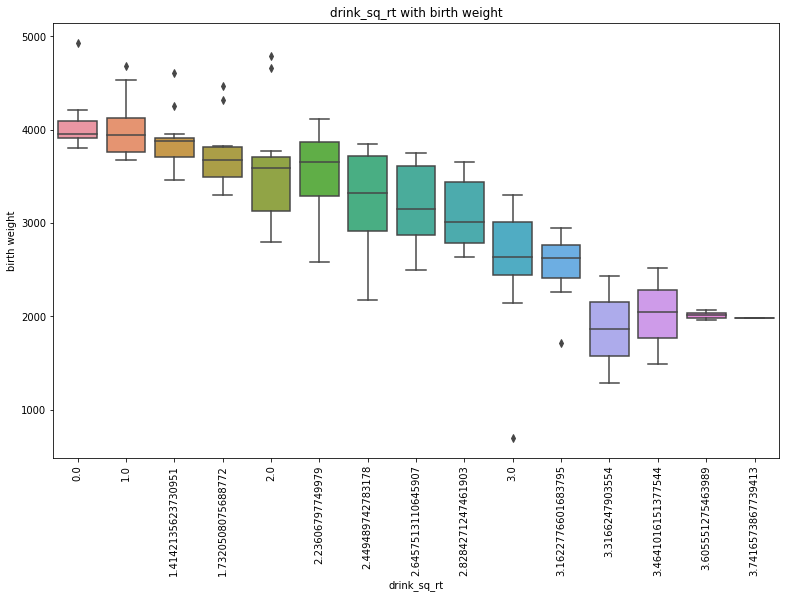

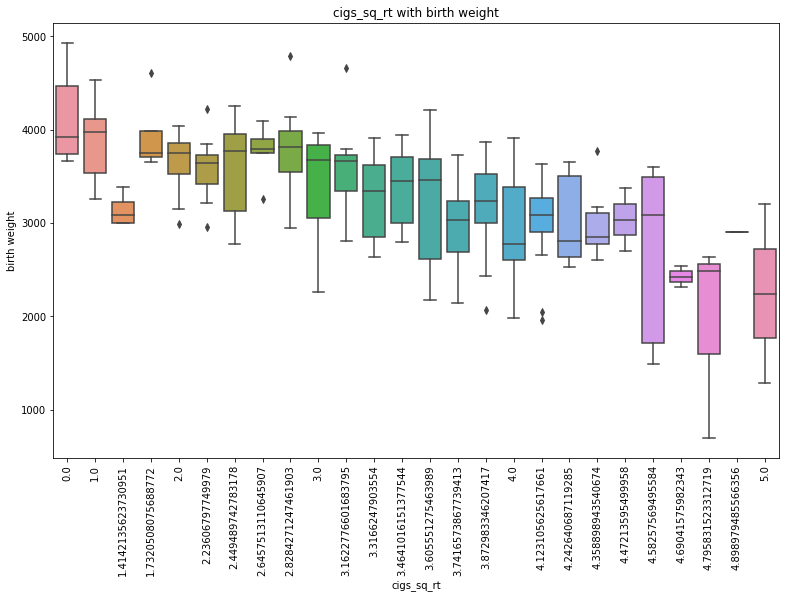

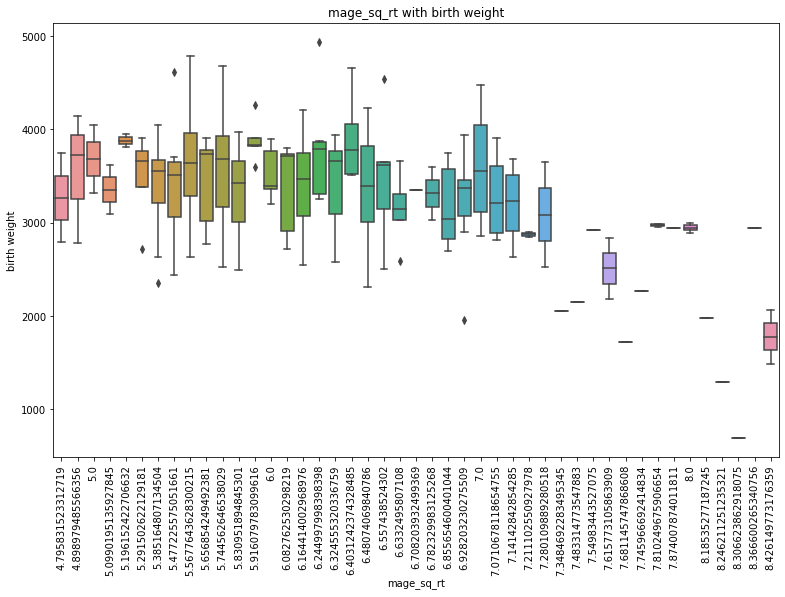

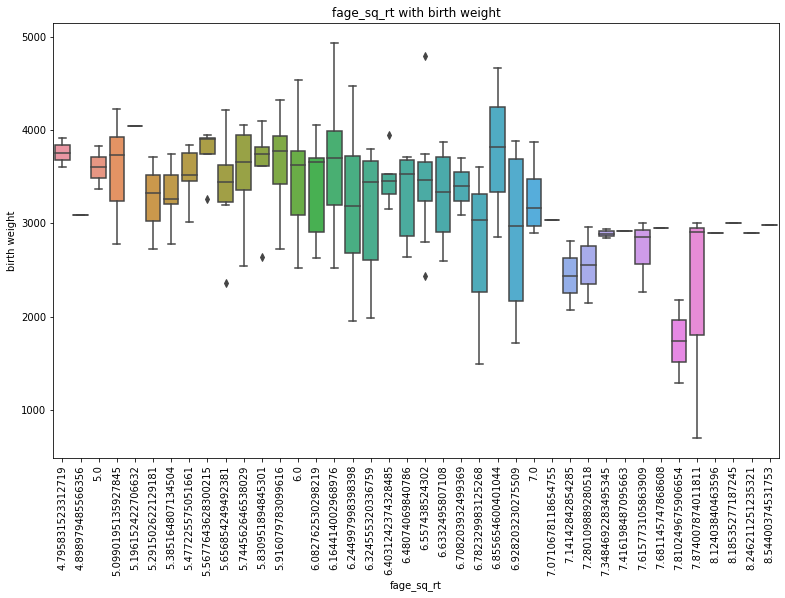

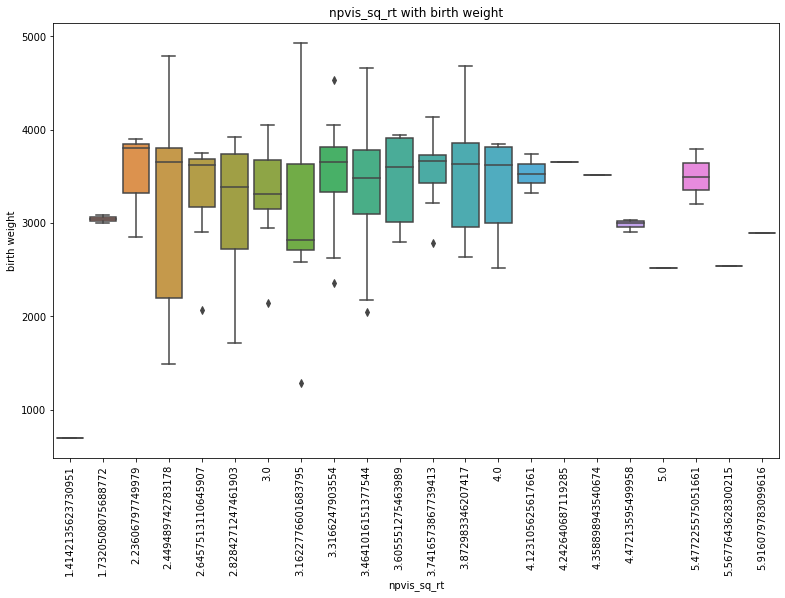

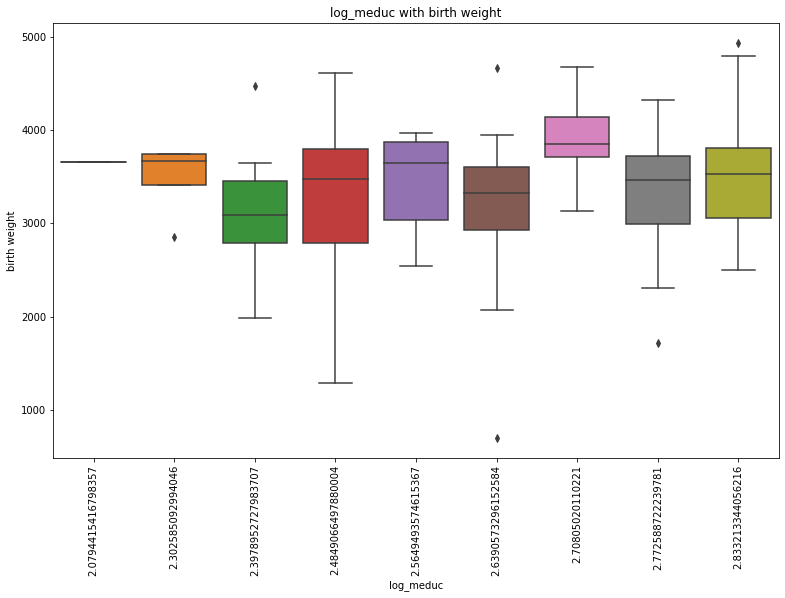

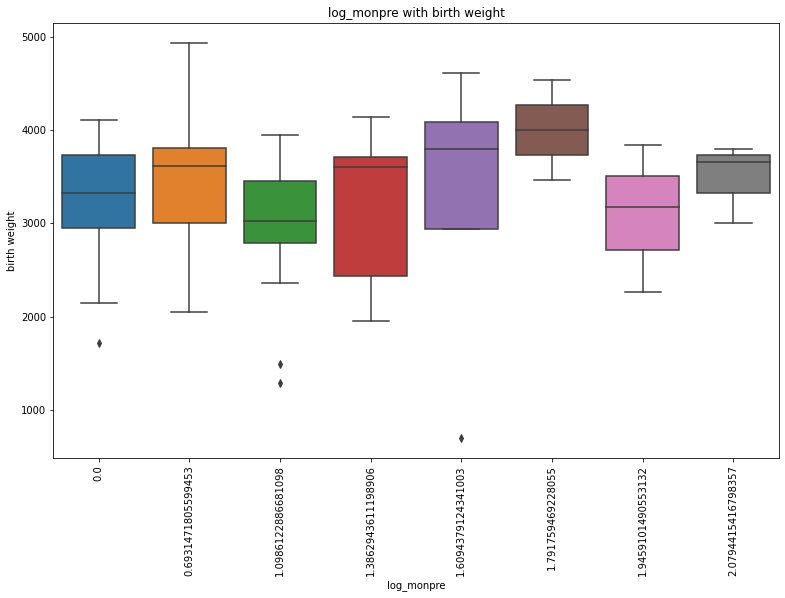

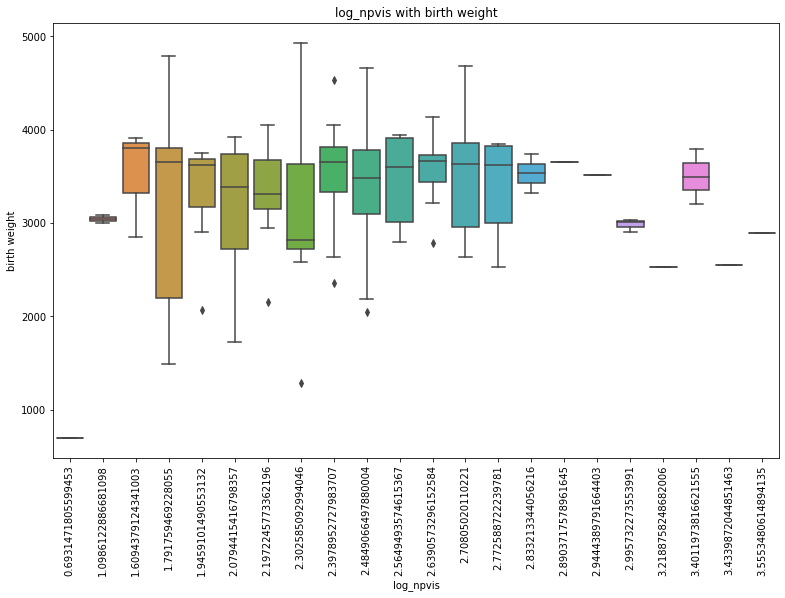

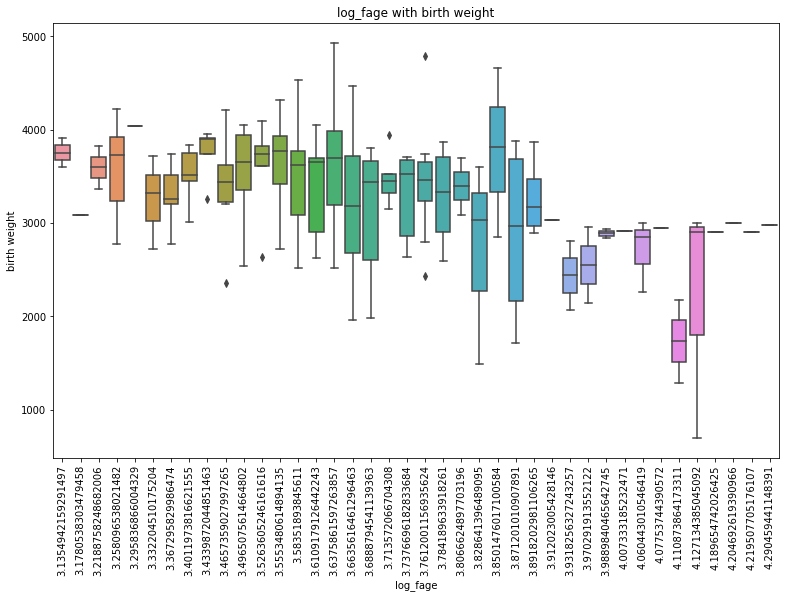

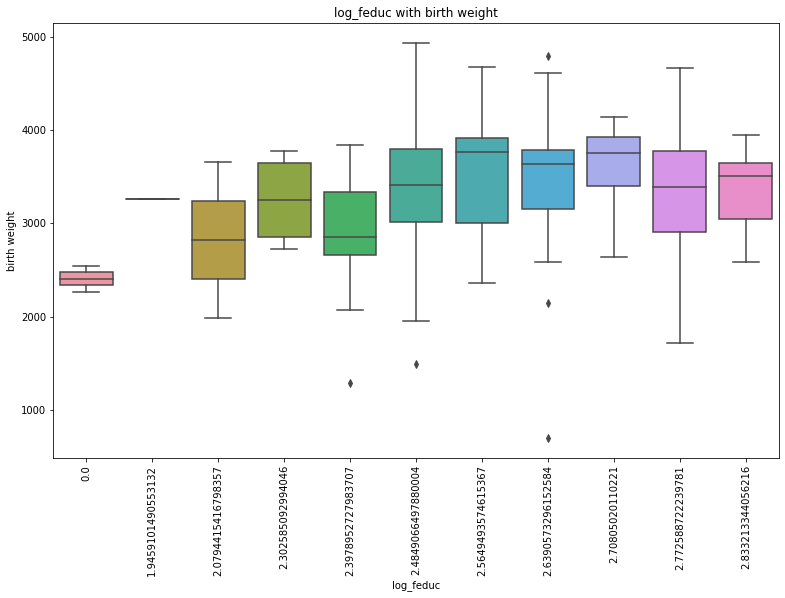

In [14]:
#Boxplots for all variables
data = ['bwght', 'log_bwght']
#For loop creating Boxplots
for column in weight:
    if  column not in (data):
        fig, ax = plt.subplots(figsize =(13, 8))
        sns_boxplot = sns.boxplot(x     = column,
                    y     = 'bwght',
                    data  = weight)
#Naming the labels
        plt.title(label   = column + ' with birth weight')
        plt.xlabel(xlabel = column)
        plt.ylabel(ylabel = 'birth weight')
        plt.setp(sns_boxplot.get_xticklabels(), rotation=90)
        plt.show()

In [15]:
#pearson correlation of weight
df_corr = weight.corr(method = 'pearson').round(2)
print(df_corr.loc['log_bwght'].sort_values(ascending = False))

log_bwght          1.00
bwght              0.97
fmaps              0.32
omaps              0.31
log_npvis          0.24
npvis_sq_rt        0.17
log_feduc          0.16
total_educ         0.13
feduc              0.13
npvis              0.11
fblck              0.09
log_meduc          0.09
meduc              0.09
mblck              0.09
male               0.08
m_npvis            0.06
moth               0.00
fwhte             -0.04
foth              -0.04
log_monpre        -0.09
m_feduc           -0.09
monpre            -0.09
mwhte             -0.11
m_meduc           -0.24
log_fage          -0.39
fage_sq_rt        -0.40
fage              -0.41
fage_sqr          -0.42
mage_sq_rt        -0.47
cigs_sq_rt        -0.50
mage              -0.50
mage_sqr          -0.54
cigs              -0.55
cigs_sqr          -0.57
drink_sq_rt       -0.62
drink             -0.70
drink_cigs        -0.71
drink_sqr         -0.71
drink_cigs_sqr    -0.75
drink_cigs_fage   -0.83
drink_cigs_mage   -0.83
Name: log_bwght,

In [16]:
#drop the columns fmaps and omaps as these represnt tests that are made after
#birth
weight.drop(labels=['fmaps', 'omaps'],
           axis = 1,
           inplace = True)

weight.head(n=10)

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,...,cigs_sq_rt,mage_sq_rt,fage_sq_rt,npvis_sq_rt,log_bwght,log_meduc,log_monpre,log_npvis,log_fage,log_feduc
0,69,14.0,5,2.0,62,14.0,23,9,1,0,...,4.795832,8.306624,7.874008,1.414214,6.546785,2.639057,1.609438,0.693147,4.127134,2.639057
1,68,12.0,3,10.0,61,11.0,25,11,1,1,...,5.000000,8.246211,7.810250,3.162278,7.162397,2.484907,1.098612,2.302585,4.110874,2.397895
2,71,12.0,3,6.0,46,12.0,21,12,1,0,...,4.582576,8.426150,6.782330,2.449490,7.306531,2.484907,1.098612,1.791759,3.828641,2.484907
3,59,16.0,1,8.0,48,16.0,21,10,0,0,...,4.582576,7.681146,6.928203,2.828427,7.450080,2.772589,0.000000,2.079442,3.871201,2.772589
4,48,12.0,4,6.0,39,12.0,17,13,0,1,...,4.123106,6.928203,6.244998,2.449490,7.578657,2.484907,1.386294,1.791759,3.663562,2.484907
5,67,11.0,4,8.0,40,8.0,16,14,0,1,...,4.000000,8.185353,6.324555,2.828427,7.592870,2.397895,1.386294,2.079442,3.688879,2.079442
6,54,12.0,2,12.0,46,12.0,17,12,1,0,...,4.123106,7.348469,6.782330,3.464102,7.625595,2.484907,0.693147,2.484907,3.828641,2.484907
7,71,14.0,4,7.0,51,11.0,15,13,0,1,...,3.872983,8.426150,7.141428,2.645751,7.634337,2.639057,1.386294,1.945910,3.931826,2.397895
8,56,12.0,1,9.0,53,14.0,14,9,1,1,...,3.741657,7.483315,7.280110,3.000000,7.672292,2.484907,0.000000,2.197225,3.970292,2.639057
9,58,12.0,2,12.0,61,16.0,13,6,0,0,...,3.605551,7.615773,7.810250,3.464102,7.687080,2.484907,0.693147,2.484907,4.110874,2.772589


In [17]:

#cluster age into 5 bins
for index, column in weight.iterrows():

#differenciating the "mage" by age ranges

    if weight.loc[index, "mage"] < 31: 
        weight.loc[index, "d_mage"] = "f_23_to_30"
    elif weight.loc[index, "mage"] <= 51: 
         weight.loc[index, "d_mage"] = "f_32_to_51"
    elif weight.loc[index, "mage"] > 51: 
         weight.loc[index, "d_mage"] = "f_52_upwards"
    else:
        print('Error')
#differenciating the "educ" by years    
    if weight.loc[index, "feduc"] <=  11: 
        weight.loc[index, "d_feduc"] = 0
    elif weight.loc[index, "feduc"] >  11: 
         weight.loc[index, "d_feduc"] = 1
    else:
        print('Error')
#differenciating the "drink" to dummies        
    if weight.loc[index, "drink"] <=  9: 
        weight.loc[index, "d_drink"] = 0
    elif weight.loc[index, "drink"] >  9: 
        weight.loc[index, "d_drink"] = 1
    else:
        print('Error')
#differenciating the "meduc" by years     
    if weight.loc[index, "meduc"] > 14:
         weight.loc[index, "d_meduc"] = 1
    elif weight.loc[index, "meduc"] <= 14:
         weight.loc[index, "d_meduc"] = 0
    else:
        print("Error")
#differenciating the "cigs" by dummies     
    if weight.loc[index, "cigs"] <= 1:
         weight.loc[index, "d_cigs"] ='firstrange'
    elif weight.loc[index, "cigs"] <=16:
         weight.loc[index, "d_cigs"] = 'secondrange'
    elif weight.loc[index, "cigs"] >=17:
        weight.loc[index, "d_cigs"] = 'thirdrange'
    else:
        print("Error")        

        
#create dummies for age bins created        
dummie_weight = pd.get_dummies(data = weight, columns = ['d_mage', 'd_cigs'])
weight = dummie_weight

In [18]:
weight.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink',
       'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght',
       'm_meduc', 'm_npvis', 'm_feduc', 'drink_cigs_mage', 'drink_cigs_fage',
       'drink_sqr', 'cigs_sqr', 'mage_sqr', 'fage_sqr', 'drink_cigs',
       'drink_cigs_sqr', 'total_educ', 'drink_sq_rt', 'cigs_sq_rt',
       'mage_sq_rt', 'fage_sq_rt', 'npvis_sq_rt', 'log_bwght', 'log_meduc',
       'log_monpre', 'log_npvis', 'log_fage', 'log_feduc', 'd_feduc',
       'd_drink', 'd_meduc', 'd_mage_f_23_to_30', 'd_mage_f_32_to_51',
       'd_mage_f_52_upwards', 'd_cigs_firstrange', 'd_cigs_secondrange',
       'd_cigs_thirdrange'],
      dtype='object')

# Regression Models

In [19]:
import statsmodels.formula.api as smf 

#Instantiate a model object
lm_best = smf.ols(formula =  """bwght       ~ d_mage_f_52_upwards +
                                            d_feduc +
                                            d_meduc +
                                            drink +
                                            d_cigs_thirdrange  +
                                            d_cigs_firstrange
                                            """,
                                data = weight)

#Fit the data into the model object
results = lm_best.fit()

#Print SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     69.85
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           2.42e-45
Time:                        21:45:20   Log-Likelihood:                -1431.6
No. Observations:                 196   AIC:                             2877.
Df Residuals:                     189   BIC:                             2900.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3925.3480    

In [20]:
#Importing Modeling Sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model 

#Dropping bweight colun
weight_data   = weight.drop(["bwght", "log_bwght"],
                               axis = 1)

#X Variables
x_variables = ['d_drink',
'drink',
'd_cigs_thirdrange',
'd_cigs_firstrange',
'd_mage_f_52_upwards',
'd_meduc',
'd_feduc'
]

#Filtering on X variables
ols_data = weight.loc[ : , x_variables]

# preparing response variable
weight_target = weight.loc[ : , "bwght"]


#splitting into train and test data
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            weight_data,     # x-variables
            weight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            weight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)



In [21]:
#Instantiating Lasso model
lasso = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude

#Fitting training data
lasso_fit = lasso.fit(x_train_OLS, y_train_OLS)


#Predicting new data
lasso_pred = lasso_fit.predict(x_test_OLS)


#Printing results
print('Lasso Training Score:', lasso.score(x_train_OLS, y_train_OLS).round(3))
print('Lasso Testing Score:', lasso.score(x_test_OLS, y_test_OLS).round(3))


lasso_train = lasso.score(x_train_OLS, y_train_OLS).round(3) 
lasso_test  = lasso.score(x_test_OLS, y_test_OLS).round(4)   


#Printing results
print('Lasso Train-Test Gap :', abs(lasso_train - lasso_test).round(3))
lasso_gap = abs(lasso_train - lasso_test).round(4)


Lasso Training Score: 0.69
Lasso Testing Score: 0.661
Lasso Train-Test Gap : 0.029


In [22]:
#Instantiating Linear Regression model
lr = LinearRegression()


#Fitting training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


#Predicting new data
lr_pred = lr_fit.predict(x_test_OLS)

lr_train = lr.score(x_train_OLS, y_train_OLS).round(3)
lr_test = lr.score(x_test_OLS, y_test_OLS).round(3)
lr_gap = abs(lr_train - lr_test).round(3)

#Printing results
print('OLS Training Score:', lr.score(x_train_OLS, y_train_OLS).round(3))
print('OLS Testing Score:',  lr.score(x_test_OLS, y_test_OLS).round(3)) 


OLS Training Score: 0.691
OLS Testing Score: 0.66


In [23]:
#Instantiating ARD model
ard = sklearn.linear_model.ARDRegression()


#Fitting training data
ard_fit = ard.fit(x_train_OLS, y_train_OLS)


#Predicting new data
ard_pred = ard_fit.predict(x_test_OLS)

#Defining variables for scores
ard_train = ard.score(x_train_OLS, y_train_OLS).round(4)
ard_test = ard.score(x_test_OLS, y_test_OLS).round(4)
ard_gap = abs(ard_train - ard_test).round(4)

#Printing results
print('Training Score:', ard_train )
print('Testing Score:',  ard_test )
print('ARD Train-Test Gap:', abs(ard_train - ard_test).round(4))


Training Score: 0.6883
Testing Score: 0.6571
ARD Train-Test Gap: 0.0312


# Comparing and choosing best model

In [28]:
#printing a comparison
print(f"""
Model      Train Score       Test Score      Gap
******     ***********       **********      ****
OLS        {lr_train}             {lr_test}            {lr_gap}
Lasso      {lasso_train}              {lasso_test}          {lasso_gap}
ARD        {ard_train}            {ard_test}          {ard_gap}
""")
#printing what model was chosen as best
print("*** The best model chosen is the ARD Regression Model. ***")


Model      Train Score       Test Score      Gap
******     ***********       **********      ****
OLS        0.691             0.66            0.031
Lasso      0.69              0.6611          0.0289
ARD        0.6883            0.6571          0.0312

*** The best model chosen is the ARD Regression Model. ***
